# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [ ]:
data = pd.read_csv("Dataset_inisiasi.csv")

In [ ]:
data.info()
print('\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75880 entries, 0 to 75879
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order_ID       75880 non-null  object 
 1   Customer_ID    75880 non-null  object 
 2   Customer_Type  75880 non-null  object 
 3   Product        75880 non-null  object 
 4   Category       75880 non-null  object 
 5   Unit_Price     75880 non-null  float64
 6   Quantity       75880 non-null  float64
 7   Discount       75880 non-null  float64
 8   Total_Price    75880 non-null  float64
 9   Region         75880 non-null  object 
 10  Order_Date     75880 non-null  object 
 11  Cluster        75880 non-null  int64  
dtypes: float64(4), int64(1), object(7)
memory usage: 6.9+ MB




In [ ]:
data.head()

,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date,Cluster
0,ORD338798,CUS165,B2C,Rauch Multivitamin,Juices,2.45,14.0,0.00,34.30,Sachsen,2023-08-15,1
1,ORD986320,CUS8013,B2C,Vio Wasser,Water,1.66,13.0,0.00,21.58,Bremen,2022-06-02,1
2,ORD1602269,CUS7200,B2C,Volvic,Water,0.55,8.0,0.00,4.40,Sachsen,2021-08-31,1
3,ORD240292,CUS8625,B2C,Pepsi,Soft Drinks,1.49,12.0,0.00,17.88,Sachsen-Anhalt,2021-03-11,1
4,ORD276567,CUS2508,B2B,Fanta,Soft Drinks,0.74,4.0,0.05,2.81,Saarland,2023-12-20,3


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [ ]:
print(data.columns)

Index(['Order_ID', 'Customer_ID', 'Customer_Type', 'Product', 'Category',
       'Unit_Price', 'Quantity', 'Discount', 'Total_Price', 'Region',
       'Order_Date', 'Cluster'],
      dtype='object')


In [29]:
data = data.drop(columns=['Order_ID', 'Customer_ID', 'Order_Date'])

In [31]:
data = data.drop_duplicates(ignore_index=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42978 entries, 0 to 42977
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Customer_Type  42978 non-null  object 
 1   Product        42978 non-null  object 
 2   Category       42978 non-null  object 
 3   Unit_Price     42978 non-null  float64
 4   Quantity       42978 non-null  float64
 5   Discount       42978 non-null  float64
 6   Total_Price    42978 non-null  float64
 7   Region         42978 non-null  object 
 8   Cluster        42978 non-null  int64  
dtypes: float64(4), int64(1), object(4)
memory usage: 3.0+ MB


In [32]:
X = data.drop(columns=['Cluster'])
y = data['Cluster']

X.head()

,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region
0,B2C,Rauch Multivitamin,Juices,2.45,14.0,0.00,34.30,Sachsen
1,B2C,Vio Wasser,Water,1.66,13.0,0.00,21.58,Bremen
2,B2C,Volvic,Water,0.55,8.0,0.00,4.40,Sachsen
3,B2C,Pepsi,Soft Drinks,1.49,12.0,0.00,17.88,Sachsen-Anhalt
4,B2B,Fanta,Soft Drinks,0.74,4.0,0.05,2.81,Saarland


In [33]:
scaler = MinMaxScaler()

numeric_columns = X.select_dtypes(include=['int64', 'float64']).columns
X[numeric_columns] = scaler.fit_transform(X[numeric_columns])

X.head()

,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region
0,B2C,Rauch Multivitamin,Juices,0.348039,0.194030,0.0,0.208303,Sachsen
1,B2C,Vio Wasser,Water,0.218954,0.179104,0.0,0.130304,Bremen
2,B2C,Volvic,Water,0.037582,0.104478,0.0,0.024957,Sachsen
3,B2C,Pepsi,Soft Drinks,0.191176,0.164179,0.0,0.107616,Sachsen-Anhalt
4,B2B,Fanta,Soft Drinks,0.068627,0.044776,0.5,0.015207,Saarland


In [34]:
encoder = LabelEncoder()

categorical_columns = X.select_dtypes(include=['object']).columns
for column in categorical_columns:
    X[column] = encoder.fit_transform(X[column])

X.head()

,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region
0,1,24,1,0.348039,0.194030,0.0,0.208303,12
1,1,35,3,0.218954,0.179104,0.0,0.130304,4
2,1,37,3,0.037582,0.104478,0.0,0.024957,12
3,1,23,2,0.191176,0.164179,0.0,0.107616,13
4,0,9,2,0.068627,0.044776,0.5,0.015207,11


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

print(f"Ukuran set pelatihan: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Ukuran set uji: X_test={X_test.shape}, y_test={y_test.shape}")

Ukuran set pelatihan: X_train=(34382, 8), y_train=(34382,)
Ukuran set uji: X_test=(8596, 8), y_test=(8596,)


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [36]:
nb = GaussianNB().fit(X_train, y_train)

rf = RandomForestClassifier(random_state=69).fit(X_train, y_train)

print("Proses pelatihan model selesai.")

Proses pelatihan model selesai.


Tulis narasi atau penjelasan algoritma yang Anda gunakan.

1. Naive Bayes (GaussianNB)
Naive Bayes merupakan algoritma klasifikasi yang didasarkan pada prinsip Teorema Bayes, yang menghitung kemungkinan suatu data termasuk dalam kelas tertentu berdasarkan fitur-fiturnya. Metode ini mengasumsikan bahwa setiap fitur bersifat independen satu sama lain, yang dikenal sebagai asumsi "naïf".
Dalam implementasinya, digunakan Gaussian Naive Bayes, yang ideal untuk data yang memiliki distribusi mendekati normal. Model ini memperkirakan peluang setiap kelas dengan memanfaatkan distribusi Gaussian dari fitur numerik, dan mengklasifikasikan data ke dalam kelas dengan probabilitas tertinggi.

2. Random Forest Classifier
Random Forest adalah metode ensemble yang membangun banyak pohon keputusan (decision tree) dari sampel data yang berbeda, lalu menggabungkan hasilnya melalui voting mayoritas atau rata-rata untuk menghasilkan prediksi akhir.
Pada implementasi ini, digunakan RandomForestClassifier dengan konfigurasi default, kecuali pada pengaturan random_state agar hasil yang diperoleh tetap konsisten setiap kali dijalankan.

# Perbandingan antara Algoritma Naive bayes dan Random Forest

Naive Bayes dan Random Forest merupakan dua algoritma klasifikasi yang memiliki pendekatan berbeda dalam memproses data.
1. Naive Bayes
Naive Bayes, khususnya GaussianNB, mengandalkan prinsip probabilistik dari Teorema Bayes dan mengasumsikan bahwa setiap fitur bersifat independen satu sama lain. Pendekatan ini membuatnya sangat efisien dan cepat, terutama untuk dataset berukuran besar atau teks, namun bisa kurang akurat jika asumsi independensinya tidak terpenuhi.

2. Random Forest
Sebaliknya, Random Forest adalah algoritma berbasis ensemble yang menggabungkan banyak pohon keputusan untuk meningkatkan akurasi dan mengurangi overfitting. Algoritma ini lebih fleksibel dalam menangani fitur kompleks dan saling bergantung, serta mampu menghasilkan prediksi yang lebih akurat, terutama pada dataset yang besar dan bervariasi. Namun, keunggulan tersebut datang dengan biaya komputasi yang lebih tinggi dan waktu pelatihan yang lebih lama dibandingkan Naive Bayes. Dengan demikian, pilihan antara keduanya bergantung pada kebutuhan spesifik: kecepatan dan efisiensi atau akurasi dan ketahanan terhadap kompleksitas data.

# Kesimpulan

Naive Bayes cocok digunakan saat membutuhkan model yang cepat dan efisien, terutama untuk data yang sederhana atau berukuran besar. Sementara itu, Random Forest lebih unggul dalam hal akurasi dan mampu menangani data kompleks, meskipun membutuhkan waktu dan sumber daya komputasi lebih besar. Pemilihan algoritma tergantung pada tujuan analisis dan karakteristik data yang digunakan.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

Laporan Klasifikasi Random Forest:
               precision    recall  f1-score   support

           0    0.99598   0.99839   0.99718      1240
           1    1.00000   1.00000   1.00000      4873
           2    0.99919   0.99758   0.99839      1240
           3    0.99919   0.99839   0.99879      1243

    accuracy                        0.99919      8596
   macro avg    0.99859   0.99859   0.99859      8596
weighted avg    0.99919   0.99919   0.99919      8596



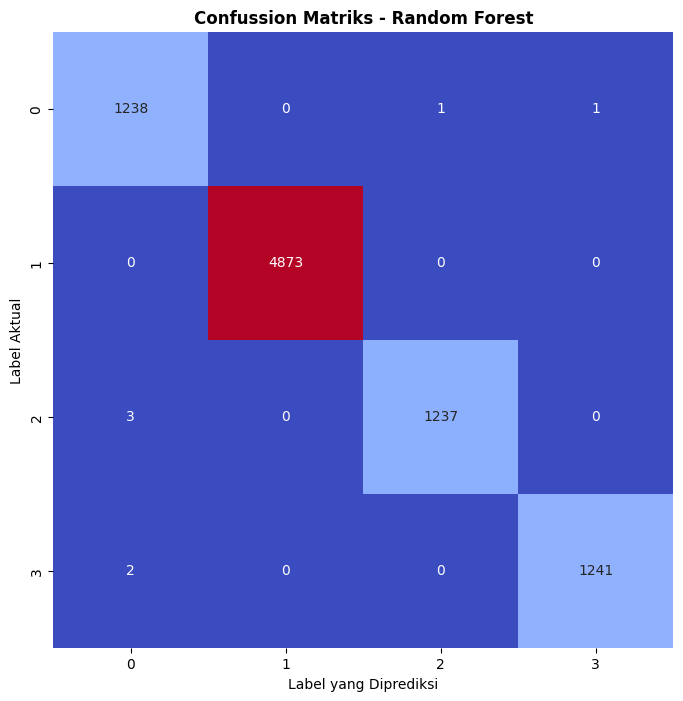

In [44]:
unique_labels = sorted(set(y))

rf_y_pred = rf.predict(X_test)

print("Laporan Klasifikasi Random Forest:\n", classification_report(y_test, rf_y_pred, digits=5))

rf_cm = confusion_matrix(y_test, rf_y_pred)

plt.figure(figsize=(8, 8))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='coolwarm', cbar=False,
            xticklabels=unique_labels,
            yticklabels=unique_labels)

plt.xlabel('Label yang Diprediksi')
plt.ylabel('Label Aktual')
plt.title('Confussion Matriks - Random Forest', fontweight='bold')
plt.show()

print('\n')

Laporan Klasifikasi Naive Bayes:
               precision    recall  f1-score   support

           0    0.93009   0.95484   0.94230      1240
           1    1.00000   1.00000   1.00000      4873
           2    0.97990   0.98306   0.98148      1240
           3    0.97430   0.94529   0.95958      1243

    accuracy                        0.98313      8596
   macro avg    0.97107   0.97080   0.97084      8596
weighted avg    0.98330   0.98313   0.98316      8596



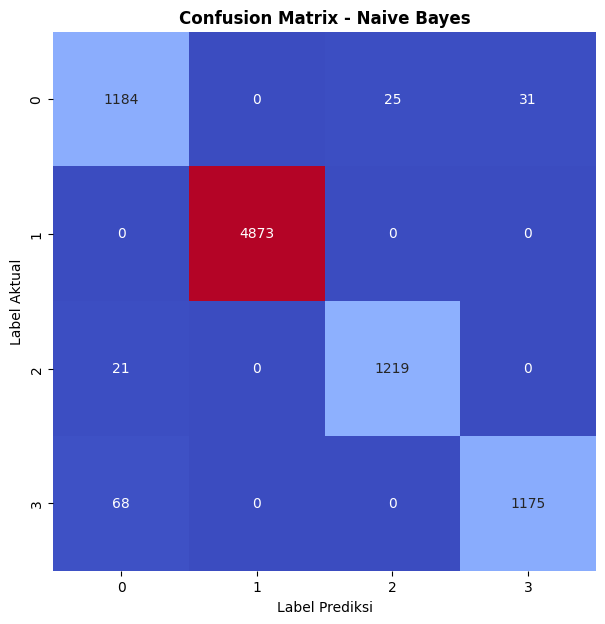

In [45]:
nb_y_pred = nb.predict(X_test)

print("Laporan Klasifikasi Naive Bayes:\n", classification_report(y_test, nb_y_pred, digits=5))

nb_cm = confusion_matrix(y_test, nb_y_pred)

plt.figure(figsize=(7, 7))
sns.heatmap(nb_cm, annot=True, fmt='d', cmap='coolwarm', cbar=False,
            xticklabels=unique_labels,
            yticklabels=unique_labels)

plt.xlabel('Label Prediksi')
plt.ylabel('Label Aktual')
plt.title('Confusion Matrix - Naive Bayes', fontweight='bold')
plt.show()

Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

In [46]:
rf_report = classification_report(y_test, rf_y_pred, digits=5, output_dict=True)
nb_report = classification_report(y_test, nb_y_pred, digits=5, output_dict=True)

In [47]:
model_metrics = {
    'Model': ['Random Forest', 'Naive Bayes'],
    'Akurasi': [rf_report['accuracy'], nb_report['accuracy']],
    'Presisi': [rf_report['weighted avg']['precision'], nb_report['weighted avg']['precision']],
    'Recall': [rf_report['weighted avg']['recall'], nb_report['weighted avg']['recall']],
    'F1-Score': [rf_report['weighted avg']['f1-score'], nb_report['weighted avg']['f1-score']]
}

In [50]:
df = pd.DataFrame(model_metrics)

df

,Model,Akurasi,Presisi,Recall,F1-Score
0,Random Forest,0.999186,0.999187,0.999186,0.999186
1,Naive Bayes,0.983132,0.983299,0.983132,0.983160


**Hasil Perbandingan Model**:

Berdasarkan hasil evaluasi, terlihat bahwa **Random Forest** menunjukkan performa yang lebih unggul dibandingkan **Naive Bayes** dalam tugas klasifikasi ini.  

**Akurasi:**  
Random Forest mencapai akurasi sebesar 99,85%, lebih tinggi dibandingkan Naive Bayes yang memperoleh 98,47%. Hal ini mengindikasikan bahwa Random Forest mampu mengklasifikasikan data secara lebih tepat.

**Presisi:**  
Dengan tingkat presisi sebesar 99,85%, Random Forest menghasilkan lebih sedikit kesalahan dalam prediksi positif dibandingkan Naive Bayes yang hanya mencapai 98,47%.

**Recall:**  
Random Forest juga lebih baik dalam mengenali seluruh data yang termasuk dalam kelas sebenarnya, dengan recall yang lebih tinggi dibanding Naive Bayes.

**F1-Score:**  
Skor F1 Random Forest menunjukkan keseimbangan yang lebih baik antara presisi dan recall, menandakan performa klasifikasi yang lebih stabil dan akurat.

**Kesimpulan:**  
Secara keseluruhan, Random Forest mendominasi dalam semua metrik evaluasi. Namun, Naive Bayes tetap menjadi pilihan yang tepat ketika dibutuhkan model yang ringan, cepat, dan mudah diimplementasikan. Pilihan akhir tergantung pada kebutuhan spesifik: apakah mengutamakan kecepatan atau ketepatan prediksi.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [ ]:
#Type your code here

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [ ]:
#Type your code here

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.